# Handling Missing Value
##What are the different types of Missing Data?
1. Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

2. Missing Data Not At Random(MNAR):
Systematic missing ValuesThere is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.


# For Continuous value

### All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Mean/Median/Mode Replacement

Q1. When should we apply?

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [3]:
df=pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
## Lets go and see the percentage of missing values
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [5]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [6]:
median=df.Age.median()
median

28.0

In [7]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [8]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


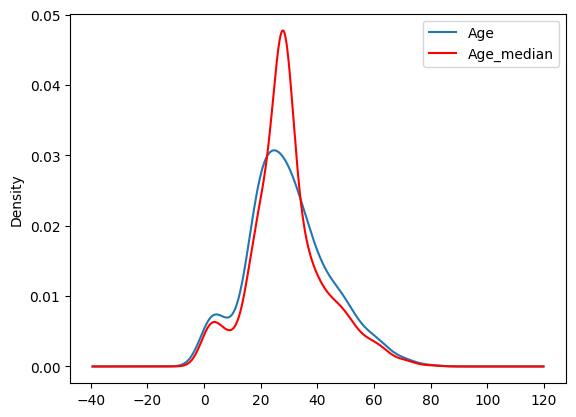

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##Advantages And Disadvantages of Mean/Median Imputation
###Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

###Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

# 2. Random Sample Imputation

* Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [3]:
import pandas as pd
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df['Age'].isnull().sum()

177

In [8]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

,Age
423,28.00
177,50.00
305,0.92
292,36.00
889,26.00
...,...
539,22.00
267,25.00
352,15.00
99,34.00


In [13]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [16]:
median = df['Age'].median()

In [20]:
def impute_nan(df,variable,median):
  df[variable+'_median'] = df[variable].fillna(median)
  df[variable+'_random'] = df[variable]
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  random_sample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [21]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


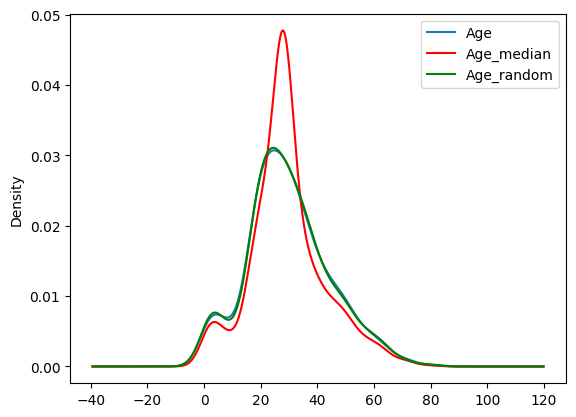

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##Advantages
1. Easy To implement
2. There is less distortion in variance

##Disadvantage
1. Every situation randomness wont work

#Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [46]:
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [27]:
df['Age'].fillna(df.Age.median(),inplace=True)

##Advantages
1. Easy to implement
2. Captures the importance of missing values

##Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

#End of Distribution imputation

In [29]:
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

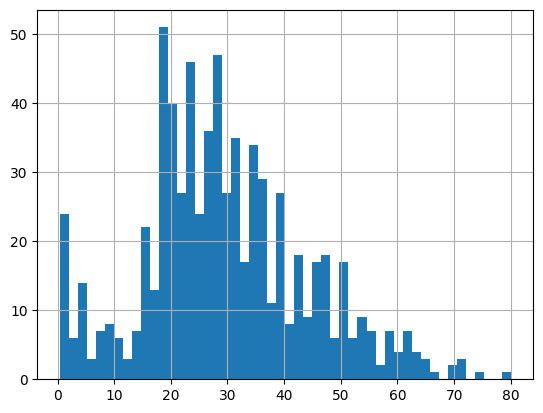

In [31]:
df.Age.hist(bins=50)

In [32]:
extreme=df.Age.mean()+3*df.Age.std()

In [34]:
import seaborn as sns

<Axes: xlabel='Age'>

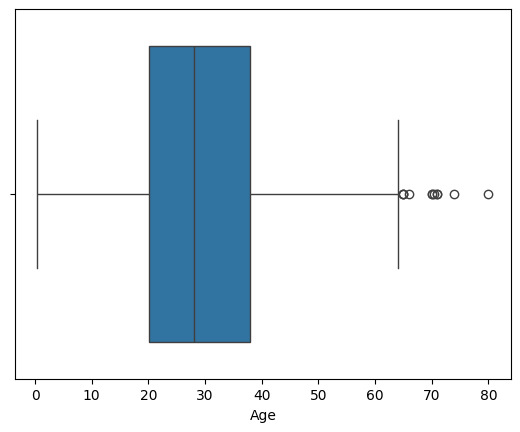

In [36]:
sns.boxplot(x ='Age',data=df)

In [37]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [39]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [41]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

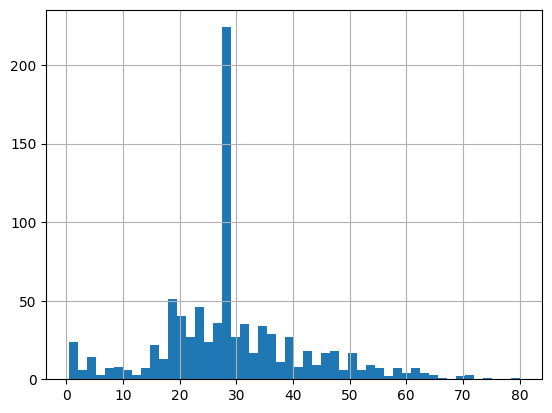

In [42]:
df['Age'].hist(bins=50)

<Axes: >

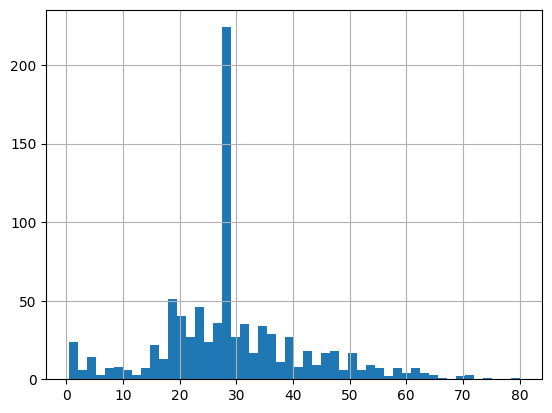

In [43]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

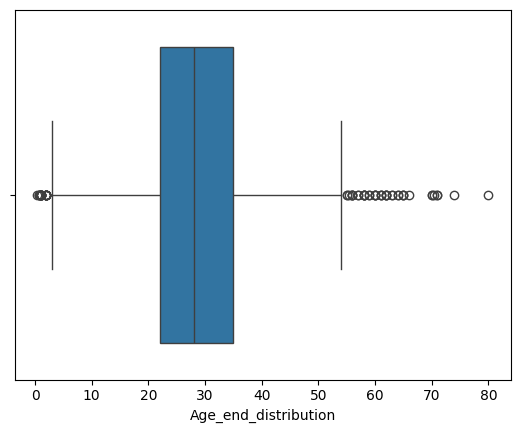

In [45]:
sns.boxplot(x = 'Age_end_distribution',data=df)

# Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value.

In [47]:
df=pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [48]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<Axes: >

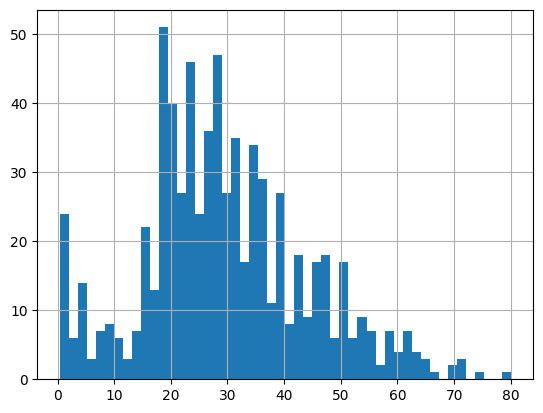

In [49]:
df['Age'].hist(bins=50)

##Advantages
1. Easy to implement
2. Captures the importance of missingess if there is one

##Disadvantages
1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
Hard to decide which value to use

# For Categorical Values
1. Frequent Category Imputation
2. Adding a variable to capture NAN
3. Have more frequent categories, we just replace NAN with a new category

#1. Frequent Category Imputation

In [66]:
df =pd.read_csv('house-prediction.csv', usecols= ['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [67]:
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [68]:
df.shape

(1460, 4)

In [69]:
df.isnull().sum()

,0
BsmtQual,37
FireplaceQu,690
GarageType,81
SalePrice,0


In [70]:
df.isnull().mean().sort_values(ascending=True)

,0
SalePrice,0.000000
BsmtQual,0.025342
GarageType,0.055479
FireplaceQu,0.472603


<Axes: xlabel='BsmtQual'>

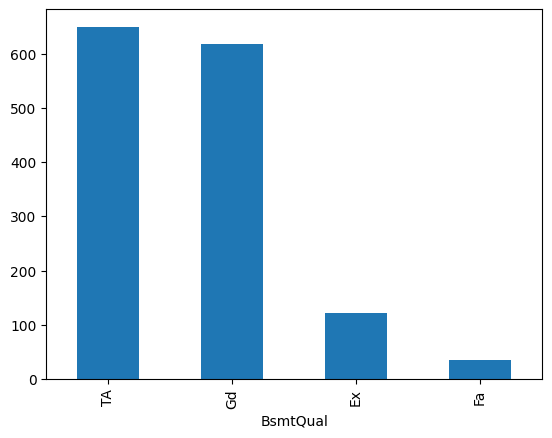

In [71]:
df['BsmtQual'].value_counts().plot.bar()

<Axes: xlabel='GarageType'>

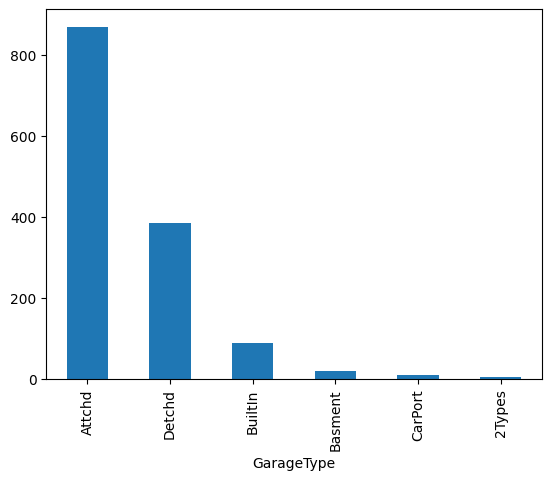

In [72]:
df['GarageType'].value_counts().plot.bar()

In [73]:
df['GarageType'].mode()[0]

'Attchd'

In [74]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [75]:
for feature in ['BsmtQual','GarageType']:
    impute_nan(df,feature)

In [76]:
df.isnull().sum()

,0
BsmtQual,0
FireplaceQu,690
GarageType,0
SalePrice,0


#Advantages
1. Easy To implement
2. Faster way to implement

#Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

#2. Adding a variable to capture NAN
In this method we are imputing using mode and before that we are also creating the new feature where it stores the null value presense or absence with the help of 0 and 1.

In [78]:
df=pd.read_csv('house-prediction.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [79]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
frequent = df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace=True)

In [80]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [81]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

#3. Have more frequent categories, we just replace NAN with a new category

In [82]:
df=pd.read_csv('house-prediction.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [83]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [84]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [85]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [86]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [87]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
